<a href="https://colab.research.google.com/github/pacesatuinineh/Gaussian-Blur/blob/main/Code1Hyrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set dataset path
DATASET_PATH = '/content/drive/MyDrive/modifdataset'  # Replace with your Google Drive dataset path

In [4]:
# 1. Load Dataset
def load_dataset(dataset_path):
    data = []
    labels = []
    for class_dir in os.listdir(dataset_path):  # Assume subdirectories are class names
        class_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    data.append(image)
                    labels.append(class_dir)
    return np.array(data), np.array(labels)

In [5]:
print("Loading dataset...")
images, labels = load_dataset(DATASET_PATH)
print(f"Dataset loaded: {len(images)} images and {len(labels)} labels.")

Loading dataset...
Dataset loaded: 1527 images and 1527 labels.


In [6]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [7]:
# 2. Preprocessing: Create Skin Mask
def preprocess_images(images):
    processed_data = []
    for image in images:
        # Convert to HSV
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Rule-Based Mask
        rule_based_mask = cv2.inRange(hsv_image, (0, 48, 80), (20, 255, 255))

        # Gaussian Skin Detection (for simplicity, we'll simulate with rule-based for now)
        gaussian_mask = cv2.GaussianBlur(rule_based_mask, (5, 5), 0)

        # Combine masks
        combined_mask = cv2.bitwise_and(rule_based_mask, gaussian_mask)

        # Flatten mask and append as features
        processed_data.append(combined_mask.flatten())
    return np.array(processed_data)

In [8]:
print("Preprocessing images...")
processed_features = preprocess_images(images)
print("Preprocessing complete.")

Preprocessing images...
Preprocessing complete.


In [9]:
# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(processed_features, encoded_labels, test_size=0.2, random_state=42)

In [10]:
# 4. Train Model
print("Training model...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Model training complete.")

Training model...
Model training complete.


In [11]:
# 5. Evaluate Model
y_pred = clf.predict(X_test)

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

     Aitinyo       0.29      0.36      0.32        80
     Ayamaru       0.21      0.27      0.24        52
      Kokoda       0.39      0.42      0.40        64
         Moi       0.28      0.28      0.28        53
       Tehit       0.40      0.11      0.17        57

    accuracy                           0.30       306
   macro avg       0.31      0.29      0.28       306
weighted avg       0.31      0.30      0.29       306



In [13]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[29 21 16 11  3]
 [24 14  6  7  1]
 [13 11 27 12  1]
 [17 11  6 15  4]
 [18  9 15  9  6]]


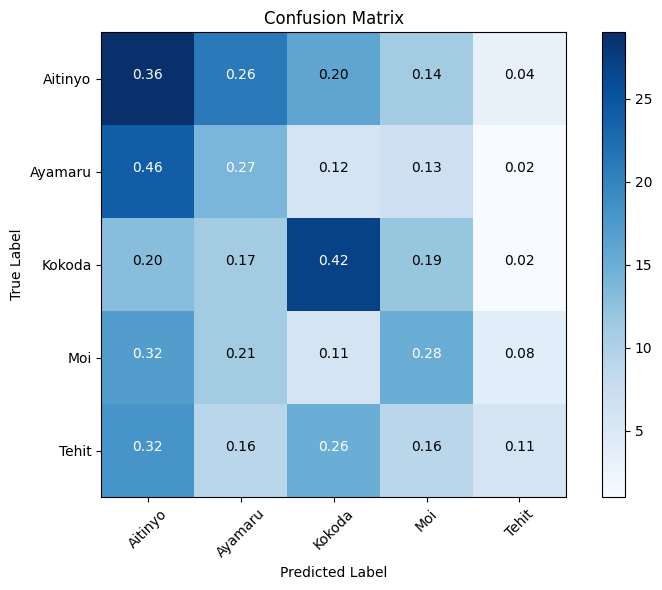

In [14]:
# 6. Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(conf_matrix, classes=label_encoder.classes_)
plt.show()